In [31]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from pydataset import data
import acquire
import prepare
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('titanic_df.csv')

- ### Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [8]:
df = prepare.prep_titanic(df)

In [9]:
df.drop(columns= ['sex', 'embark_town', 'Unnamed: 0'], inplace = True)
df

,survived,pclass,age,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
0,0,3,22.0,1,0,7.2500,0,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,1,0,0
886,0,2,27.0,0,0,13.0000,1,0,1,1
887,1,1,19.0,0,0,30.0000,1,0,1,0
889,1,1,26.0,0,0,30.0000,1,0,0,1


In [10]:
def split_data(df, target=''):
        train, test = train_test_split(df, 
                               train_size = 0.8,
                               random_state=1349,
                              stratify=df[target])
        train, val = train_test_split(train,
                             train_size = 0.7,
                             random_state=1349,
                             stratify=train[target])
        return train, val, test
    

In [11]:
train, val, test = split_data(df, target='survived')

In [12]:
X_train = train.drop(columns= ['survived'])
y_train = train['survived']

X_val = val.drop(columns= ['survived'])
y_val = val['survived']

X_test = test.drop(columns= ['survived'])
y_test = test['survived']

In [13]:
X_test.head()

,pclass,age,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
322,2,30.0,0,0,12.3500,1,1,0,0
774,2,54.0,1,3,23.0000,0,0,1,0
708,1,22.0,0,0,151.5500,1,0,1,0
391,3,21.0,0,0,7.7958,1,0,1,1
683,3,14.0,5,2,46.9000,0,0,1,1


In [14]:
seed = 42
tree1 = DecisionTreeClassifier(max_depth = 10, random_state= 42, min_samples_leaf=1)

In [15]:
tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [16]:
y_predictions = tree1.predict(X_train)

In [17]:
y_predictions

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,

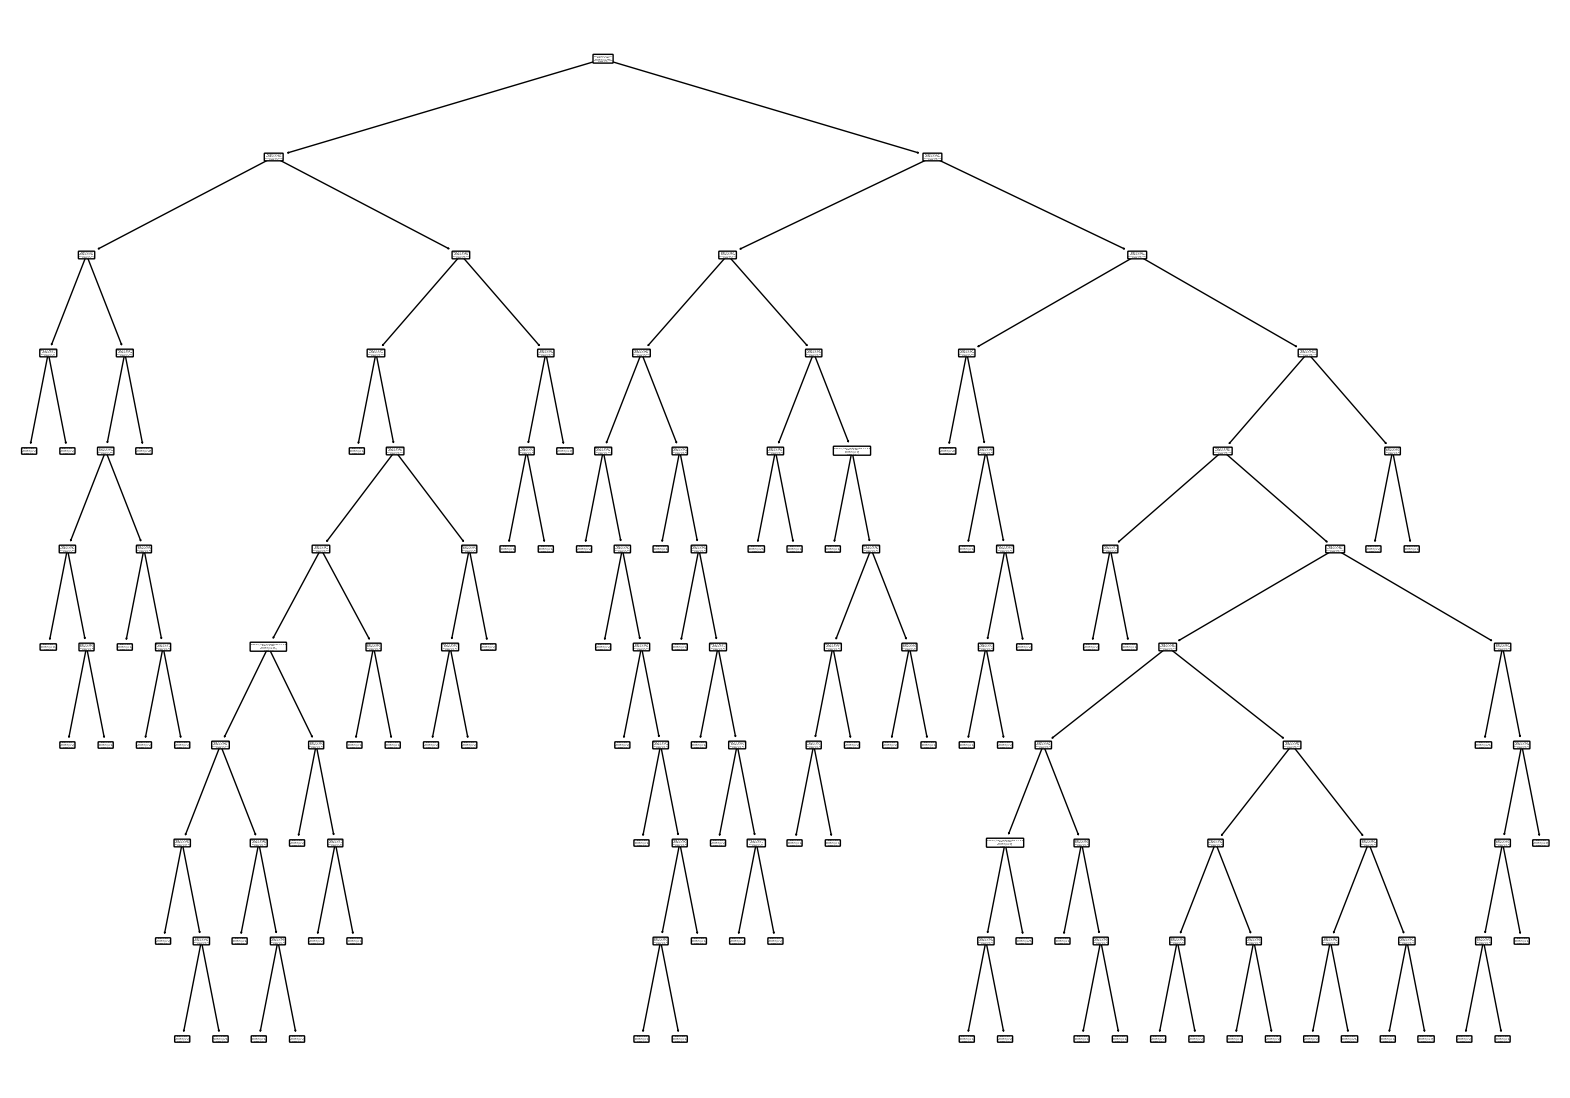

In [18]:
plt.figure(figsize=(20, 14))
plot_tree(tree1, feature_names= X_train.columns, class_names=['0', '1'], rounded=True)
plt.show()

In [19]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.96


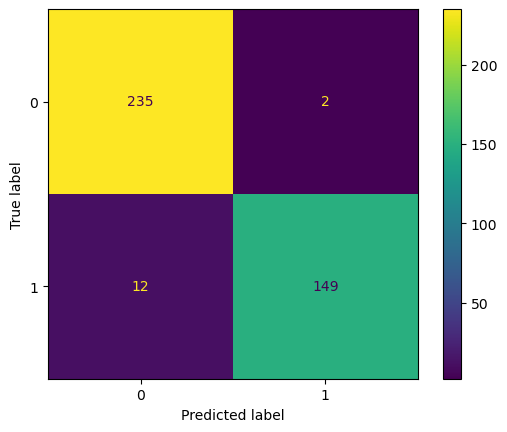

In [20]:
plot_confusion_matrix(tree1, X_train, y_train)

In [21]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       237
           1       0.99      0.93      0.96       161

    accuracy                           0.96       398
   macro avg       0.97      0.96      0.96       398
weighted avg       0.97      0.96      0.96       398



In [22]:
rf = RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, random_state=42)

In [23]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [24]:
print(rf.feature_importances_)

[0.12105122 0.26077308 0.05240671 0.04808141 0.24547766 0.01661259
 0.00627908 0.02054849 0.22876977]


In [25]:
y_pred = rf.predict(X_train)


In [26]:
print(confusion_matrix(y_train, y_predictions))


[[235   2]
 [ 12 149]]


In [27]:
rf.score(X_train, y_train)

0.9698492462311558

In [28]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       237
           1       1.00      0.93      0.96       161

    accuracy                           0.97       398
   macro avg       0.98      0.96      0.97       398
weighted avg       0.97      0.97      0.97       398



- ### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [34]:
cm = confusion_matrix(y_train, y_pred)

In [35]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

Accuracy of random forest classifier on training set: 0.97


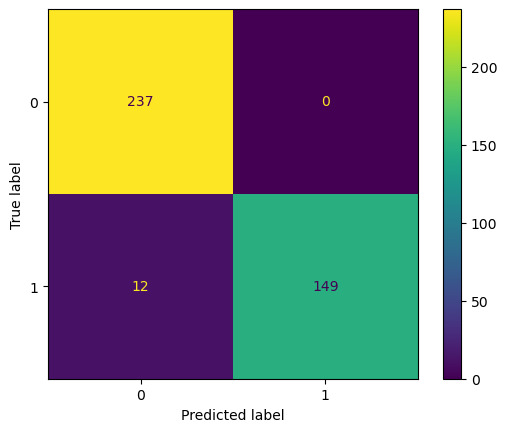

In [36]:
disp.plot()
plt.show()

- ### Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [38]:
metrics = []
max_depth = 11

for i in range(1, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,1,10,0.967337,0.789474,0.177863
1,2,9,0.927136,0.807018,0.120118
2,3,8,0.902010,0.818713,0.083297
3,4,7,0.894472,0.807018,0.087455
4,5,6,0.876884,0.812865,0.064019
5,6,5,0.866834,0.801170,0.065665
6,7,4,0.844221,0.801170,0.043052
7,8,3,0.824121,0.795322,0.028799
8,9,2,0.793970,0.777778,0.016192
9,10,1,0.781407,0.766082,0.015325


- ### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?